In [1]:
import numpy as np

def B(n : int):
    '''Given an integer [n], the function returns a matrix B, as defined 
    in the article, for a graph with [n] vertices and [n+1] edges.'''
    out = []
    out.append([1, 1] + [0]*(n-1))
    for i in range(1, n):
        out.append([0]*i + [-1, 1] + [0]*(n-1-i))
    return np.array(out)

print(B(5))  

[[ 1  1  0  0  0  0]
 [ 0 -1  1  0  0  0]
 [ 0  0 -1  1  0  0]
 [ 0  0  0 -1  1  0]
 [ 0  0  0  0 -1  1]]


In [2]:
from Hamiltonians.Libraries import HamiltonianEvolution as HE
from qiskit.quantum_info import Statevector

In [3]:
def BHamiltonian(n : int):
    '''Given an integer [n], the function returns the Hamiltonian matrix 
    for a graph with [n] vertices and [n+1] edges.'''
    H = np.block([[np.zeros((n, n)), B(n)], [np.transpose(B(n)), np.zeros((n+1, n+1))]]) / (n+1)
    return H

H = BHamiltonian(4)
print(H)

[[ 0.   0.   0.   0.   0.2  0.2  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.2  0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.2  0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.2  0.2]
 [ 0.2  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.2 -0.2  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.2 -0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.2 -0.2  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.2  0.   0.   0.   0.   0. ]]


We now wish to set the initial conditions for our model. The initial condition of our choice is one for a rigidly translating wave packet, defined via any twice-differentiable differentiable function $w$ by $$w(x -ct)$$

First, let's see what happens with a static initial state, i.e. a state where all the field values on the edges are set to zero: $$\phi_E = 0.$$
Following from that we can set the values of $\phi_V$ to any arbitrary constant values.

For now, let's set the middle vertex to have an electric field value of $1$, while all the other vertices are set to $0$.

In [4]:
# We wish to define the initial condition by splitting it into two parts,
# one for the vertices and one for the edges. 

def initial_condition(n : int):
    mid = n // 2
    out = (mid - 1) * [0] + [1] + (n - mid) * [0] + (n + 1) * [0]
    return out

init = Statevector(initial_condition(4))
print(init)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(9,))


In [5]:
# Now it's time to model the behavior of the system due to the above 
# Hamiltonian and the initial condition.

HE.evolveTime(H, 1, init)

Statevector([1.97345747e-02+0.00000000e+00j,
             9.60398227e-01+0.00000000e+00j,
             1.97346631e-02+0.00000000e+00j,
             6.61350445e-05+0.00000000e+00j,
             0.00000000e+00-1.32270215e-03j,
             0.00000000e+00+1.96026580e-01j,
             0.00000000e+00-1.96026578e-01j,
             0.00000000e+00-1.32005322e-03j,
             0.00000000e+00-2.65146661e-06j],
            dims=(9,))


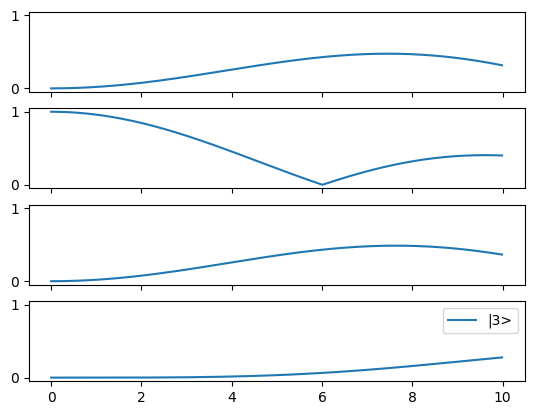

In [6]:
HE.plotEvolution(H, init, 10, 0.01)